# **Heart Attack**

## **1. Import**

### 1.1. General Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics as metrics
from sklearn.model_selection import train_test_split 

In [3]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns

In [153]:
import numpy.random as r # We will randomly initialize our weights
from sklearn.metrics import accuracy_score # 

## **2. Preparing Data**

### 2.1. Importing Data

In [60]:
df = pd.read_csv('heart.csv')
data = df.to_numpy()

In [61]:
df.shape

(303, 14)

In [62]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
X = data[:, :-1]
y = data[:, -1]

In [64]:
X.shape

(303, 13)

## **3. Model 1: Logistic Regression**

### **3.1. Without Regularization**

#### 3.1.1 Splitting Data

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

#### 3.1.2. Processing Data

##### 3.1.2.1. Reshape

In [66]:
y_2d_train = y_train.reshape(-1,1)
y_2d_test = y_test.reshape(-1,1)

In [67]:
X_train.shape, y_2d_train.shape

((227, 13), (227, 1))

##### 3.1.2.2. Design Matrix

In [68]:
ones = np.ones((X_train.shape[0], 1))
X_train_1 = np.hstack((ones,X_train))
X_train_1

array([[ 1., 57.,  1., ...,  2.,  1.,  2.],
       [ 1., 59.,  1., ...,  1.,  1.,  1.],
       [ 1., 67.,  1., ...,  1.,  2.,  3.],
       ...,
       [ 1., 69.,  1., ...,  1.,  1.,  2.],
       [ 1., 46.,  1., ...,  2.,  0.,  3.],
       [ 1., 63.,  0., ...,  2.,  2.,  2.]])

In [69]:
X_train_1.shape

(227, 14)

##### 3.1.2.3. Initialize w

In [70]:
w_init = np.zeros((X_train_1.shape[1], 1))

In [71]:
w_init.shape

(14, 1)

#### 3.1.3. Sigmoid(z)

$$\sigma (z) = \frac{1}{1 + e^{-z}}$$

In [72]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### 3.1.4. Prediction Function

$$ h(x) = \frac{1}{1 + e^{-(w_0+w_1x_1+w_2x_2+...+w_dx_d)}} $$

$$ h(x) = \frac{1}{1 + e^{-Xw}} $$

In [73]:
def hypothesis(X, w):
    return sigmoid(np.dot(X, w))

In [74]:
y_hat_init = hypothesis(X_train_1, w_init)
y_hat_init.shape

(227, 1)

#### 3.1.5. Log_likelihood Function

$$ l(w) = \sum_{i=1}^{N} y^{(i)}ln(h(x^{(i)})) + (1 - y^{(i)})ln(1 - h(x^{(i)})) $$

In [75]:
def log_likelihood(X, y, w):
    y_hat = sigmoid(np.dot(X, w))
    return np.dot(y.T, np.log(1-y_hat)) + np.dot((1-y).T, np.log(y_hat))

y_2d_train.shape, hypothesis(X_train_1, w_init).shape

((227, 1), (227, 1))

In [76]:
log_likelihood(X_train_1, y_2d_train, w_init)

array([[-157.34440999]])

#### 3.1.6. Gradient Ascent

In [77]:
def gradient_ascent(X, y, alpha, num_iters):
    N = X.shape[0]
    w = np.zeros((X.shape[1], 1))

    for _ in range(num_iters):
        y_hat = hypothesis(X, w)
        w += alpha / N * np.dot(X.T, (y - y_hat))

    return w

In [78]:
alpha = 0.0000001
num_iters = 100000
w = gradient_ascent(X_train_1, y_2d_train, alpha, num_iters)
w

array([[-5.00914040e-05],
       [-7.98775123e-03],
       [-7.83859626e-04],
       [ 1.91000670e-03],
       [-8.89328914e-03],
       [-4.49283853e-03],
       [ 2.61810824e-05],
       [ 1.98628259e-04],
       [ 1.95544716e-02],
       [-8.97480944e-04],
       [-2.09286422e-03],
       [ 8.28181376e-04],
       [-1.73114451e-03],
       [-1.08836361e-03]])

#### 3.1.7. Predict the Class Label

In [79]:
def predict_class(X, w, t = 0.5):
    p = sigmoid(np.dot(X, w))
    
    p_class = np.zeros(p.shape)
    
    p_class[p >= t] = 1
    return p_class

#### 3.1.8. Test

In [80]:
ones = np.ones((X_test.shape[0], 1))
X_test_1 = np.hstack((ones, X_test))

In [81]:
y_hat = predict_class(X_test_1, w, 0.5)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


<Axes: >

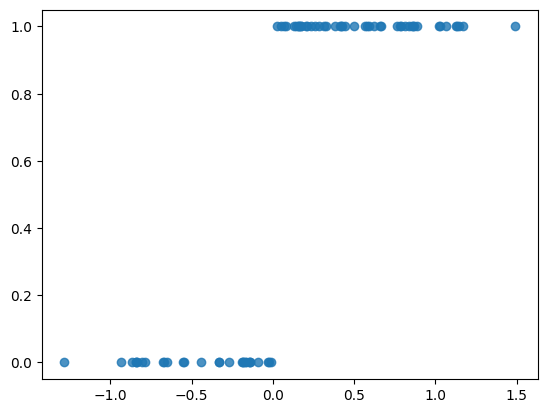

In [82]:
sns.regplot(x=np.dot(X_test_1, w), y=y_hat, data=data, logistic=True, ci=None)

#### 3.1.9. Scores

##### 3.1.9.1. Precision

In [83]:
def precision(y, y_hat):
    true_positive = np.sum(np.logical_and((y == 1), (y_hat == 1)))
    false_positive = np.sum(np.logical_and((y == 0), (y_hat == 1)))

    if true_positive + false_positive > 0:
        return true_positive / (true_positive + false_positive)
    return 0

In [84]:
prec = precision(y_2d_test, y_hat)
prec

0.723404255319149

##### 3.1.9.2. Recall

In [85]:
def recall(y, y_hat):
    true_positive = np.sum(np.logical_and((y == 1), (y_hat == 1)))
    false_negative = np.sum(np.logical_and((y == 1), (y_hat == 0)))

    if true_positive + false_negative > 0:
        return true_positive / (true_positive + false_negative)
    return 0

In [86]:
rec  = recall(y_2d_test, y_hat)
rec

0.8292682926829268

##### 3.1.9.3. F1

In [87]:
def f1(precision, recall):
    if precision + recall > 0:
        return 2 * (precision * recall) / (precision + recall)
    return 0

In [88]:
f = f1(prec, rec)
f

0.7727272727272727

##### 3.1.9.4. Confusion Matrix

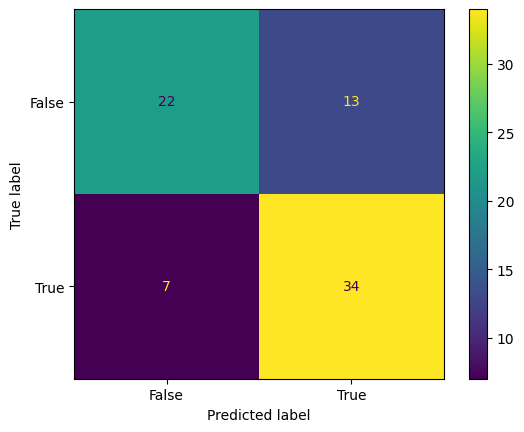

In [89]:
cm = metrics.confusion_matrix(y_2d_test, y_hat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

### **3.2. Adding L1 Regularization**

### **3.3. Adding L2 Regularization**

## **4. Model 2: Support Vector Machine**

### **4.1. Without Regularization (Wrong)**

In [90]:
# Split data

In [91]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.07, random_state=10, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, 
    test_size = 0.07, random_state=10, shuffle=True
)

In [92]:
print('X_train:' + str(X_train.shape))
print('y_train:' + str(y_train.shape))
print('X_val: \t'  + str(X_val.shape))
print('y_val: \t'  + str(y_val.shape))
print('X_test: '  + str(X_test.shape))
print('y_test: '  + str(y_test.shape))

X_train:(261, 13)
y_train:(261,)
X_val: 	(20, 13)
y_val: 	(20,)
X_test: (22, 13)
y_test: (22,)


In [93]:
X_train

array([[45.,  0.,  0., ...,  1.,  0.,  2.],
       [43.,  1.,  0., ...,  1.,  4.,  3.],
       [58.,  0.,  0., ...,  1.,  2.,  1.],
       ...,
       [46.,  1.,  0., ...,  2.,  0.,  3.],
       [71.,  0.,  0., ...,  1.,  0.,  2.],
       [54.,  1.,  2., ...,  0.,  1.,  2.]])

In [94]:
def score(X, w):
    return np.dot(X, w)  

In [95]:
def svm_objective(w, X, y, lambda1=.1):
    # To do. This part may require several lines of code. 
    # Store your answer in result. 
    result = (lambda1 / 2) * np.dot(w, w) + np.maximum(0, 1 - np.dot(y , np.dot(X, w)).T) 
    return result

In [96]:
def pegasos(X_train, y_train, lambda1 =.1, num_iters = 3):
    
    w = np.ones((X_train.shape[1],))

    for i in range(num_iters):
        for t in range(1, X_train.shape[0] + 1):
        
            alpha = 1/(lambda1*t)
    
            if y_train[t - 1] * score(X_train[t - 1], w) >= 1:
                w -= alpha * lambda1 * w
            else:
                w -= alpha * (lambda1 * w - y_train[t - 1] * X_train[t - 1])

    return w

In [97]:
w = pegasos(X_train, y_train)
w

array([ 2.2605364 ,  0.03831418,  0.        ,  5.28735632, 10.38314176,
        0.        ,  0.        ,  6.97318008,  0.        ,  0.        ,
        0.07662835,  0.        ,  0.07662835])

In [98]:
y_test = np.where(y_test == 1, y_test, -1)
y_test

array([-1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,
        1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.])

In [99]:
scores = y_test * score(X_test, w)
scores

array([-6128.08429119, -4262.33716475, -4927.81609195,  3814.09961686,
       -4322.14559387,  4670.95785441,  5060.76628352, -3877.85440613,
        4922.45210728, -3201.30268199,  3626.7816092 , -4071.49425287,
       -3792.10727969,  3839.31034483, -4500.34482759,  4341.4559387 ,
       -5393.63984674, -4237.62452107,  4138.5440613 , -4551.95402299,
        4284.75095785,  4222.83524904])

In [100]:
prediction = np.sign(scores)
prediction

array([-1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,
        1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.])

## **5. Model 3: Artificial Neural Network**

### **4.1. Without Regularization (Wrong)**

In [101]:
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [102]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [128]:
X_train.shape

(181, 13)

In [135]:
y_train = y_train.reshape((-1,1))

In [136]:
y_train.shape

(181, 1)

In [144]:
def f(z):
    return 1 / (1 + np.exp(-z))

def f_deriv(z):
    return f(z) * (1 - f(z))

In [145]:
def setup_and_init_weights(nn_structure):
    W = {} #creating a dictionary i.e. a set of key: value pairs
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1])) #Return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

In [146]:
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

In [147]:
def feed_forward(x, W, b):
    a = {1: x} # create a dictionary for holding the a values for all levels
    z = { } # create a dictionary for holding the z values for all the layers
    for l in range(1, len(W) + 1): # for each layer
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
        a[l+1] = f(z[l+1]) # a^(l+1) = f(z^(l+1))
    return a, z

In [148]:
def calculate_out_layer_delta(y, a_out, z_out):
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    return -(y-a_out) * f_deriv(z_out) 


def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)


In [149]:
def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            a, z = feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))# np.newaxis increase the number of dimensions
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l])
            b[l] += -alpha * (1.0/N * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func


def predict_y(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    return y

In [161]:
nn_structure = [13, 10, 10]
    
# train the NN
W, b, avg_cost_func = train_nn(nn_structure, X_train, y_train, 3000, 0.75)

Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 1000 of 3000
Iteration 2000 of 3000


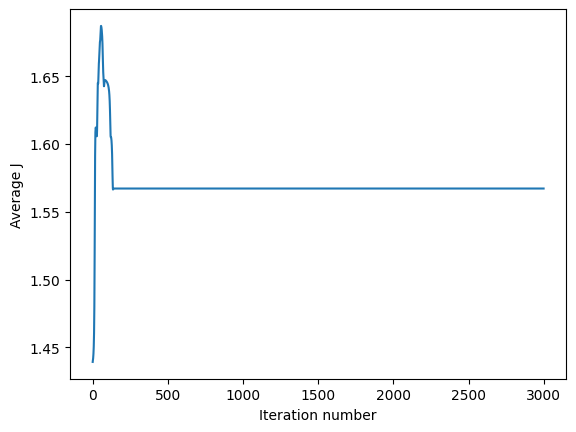

In [162]:
# plot the avg_cost_func
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [163]:
# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

Prediction accuracy is 45.90163934426229%
